In [1]:
print('test')

test


In [3]:
import pandas as pd

In [18]:
df = pd.read_csv('diabetes.csv')

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
!pip3 install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [14]:
import seaborn as sns
import numpy as np

In [15]:
df['Outcome'] = np.where(df['Outcome'] == 1, "Diabetic", " Not Diabetic")

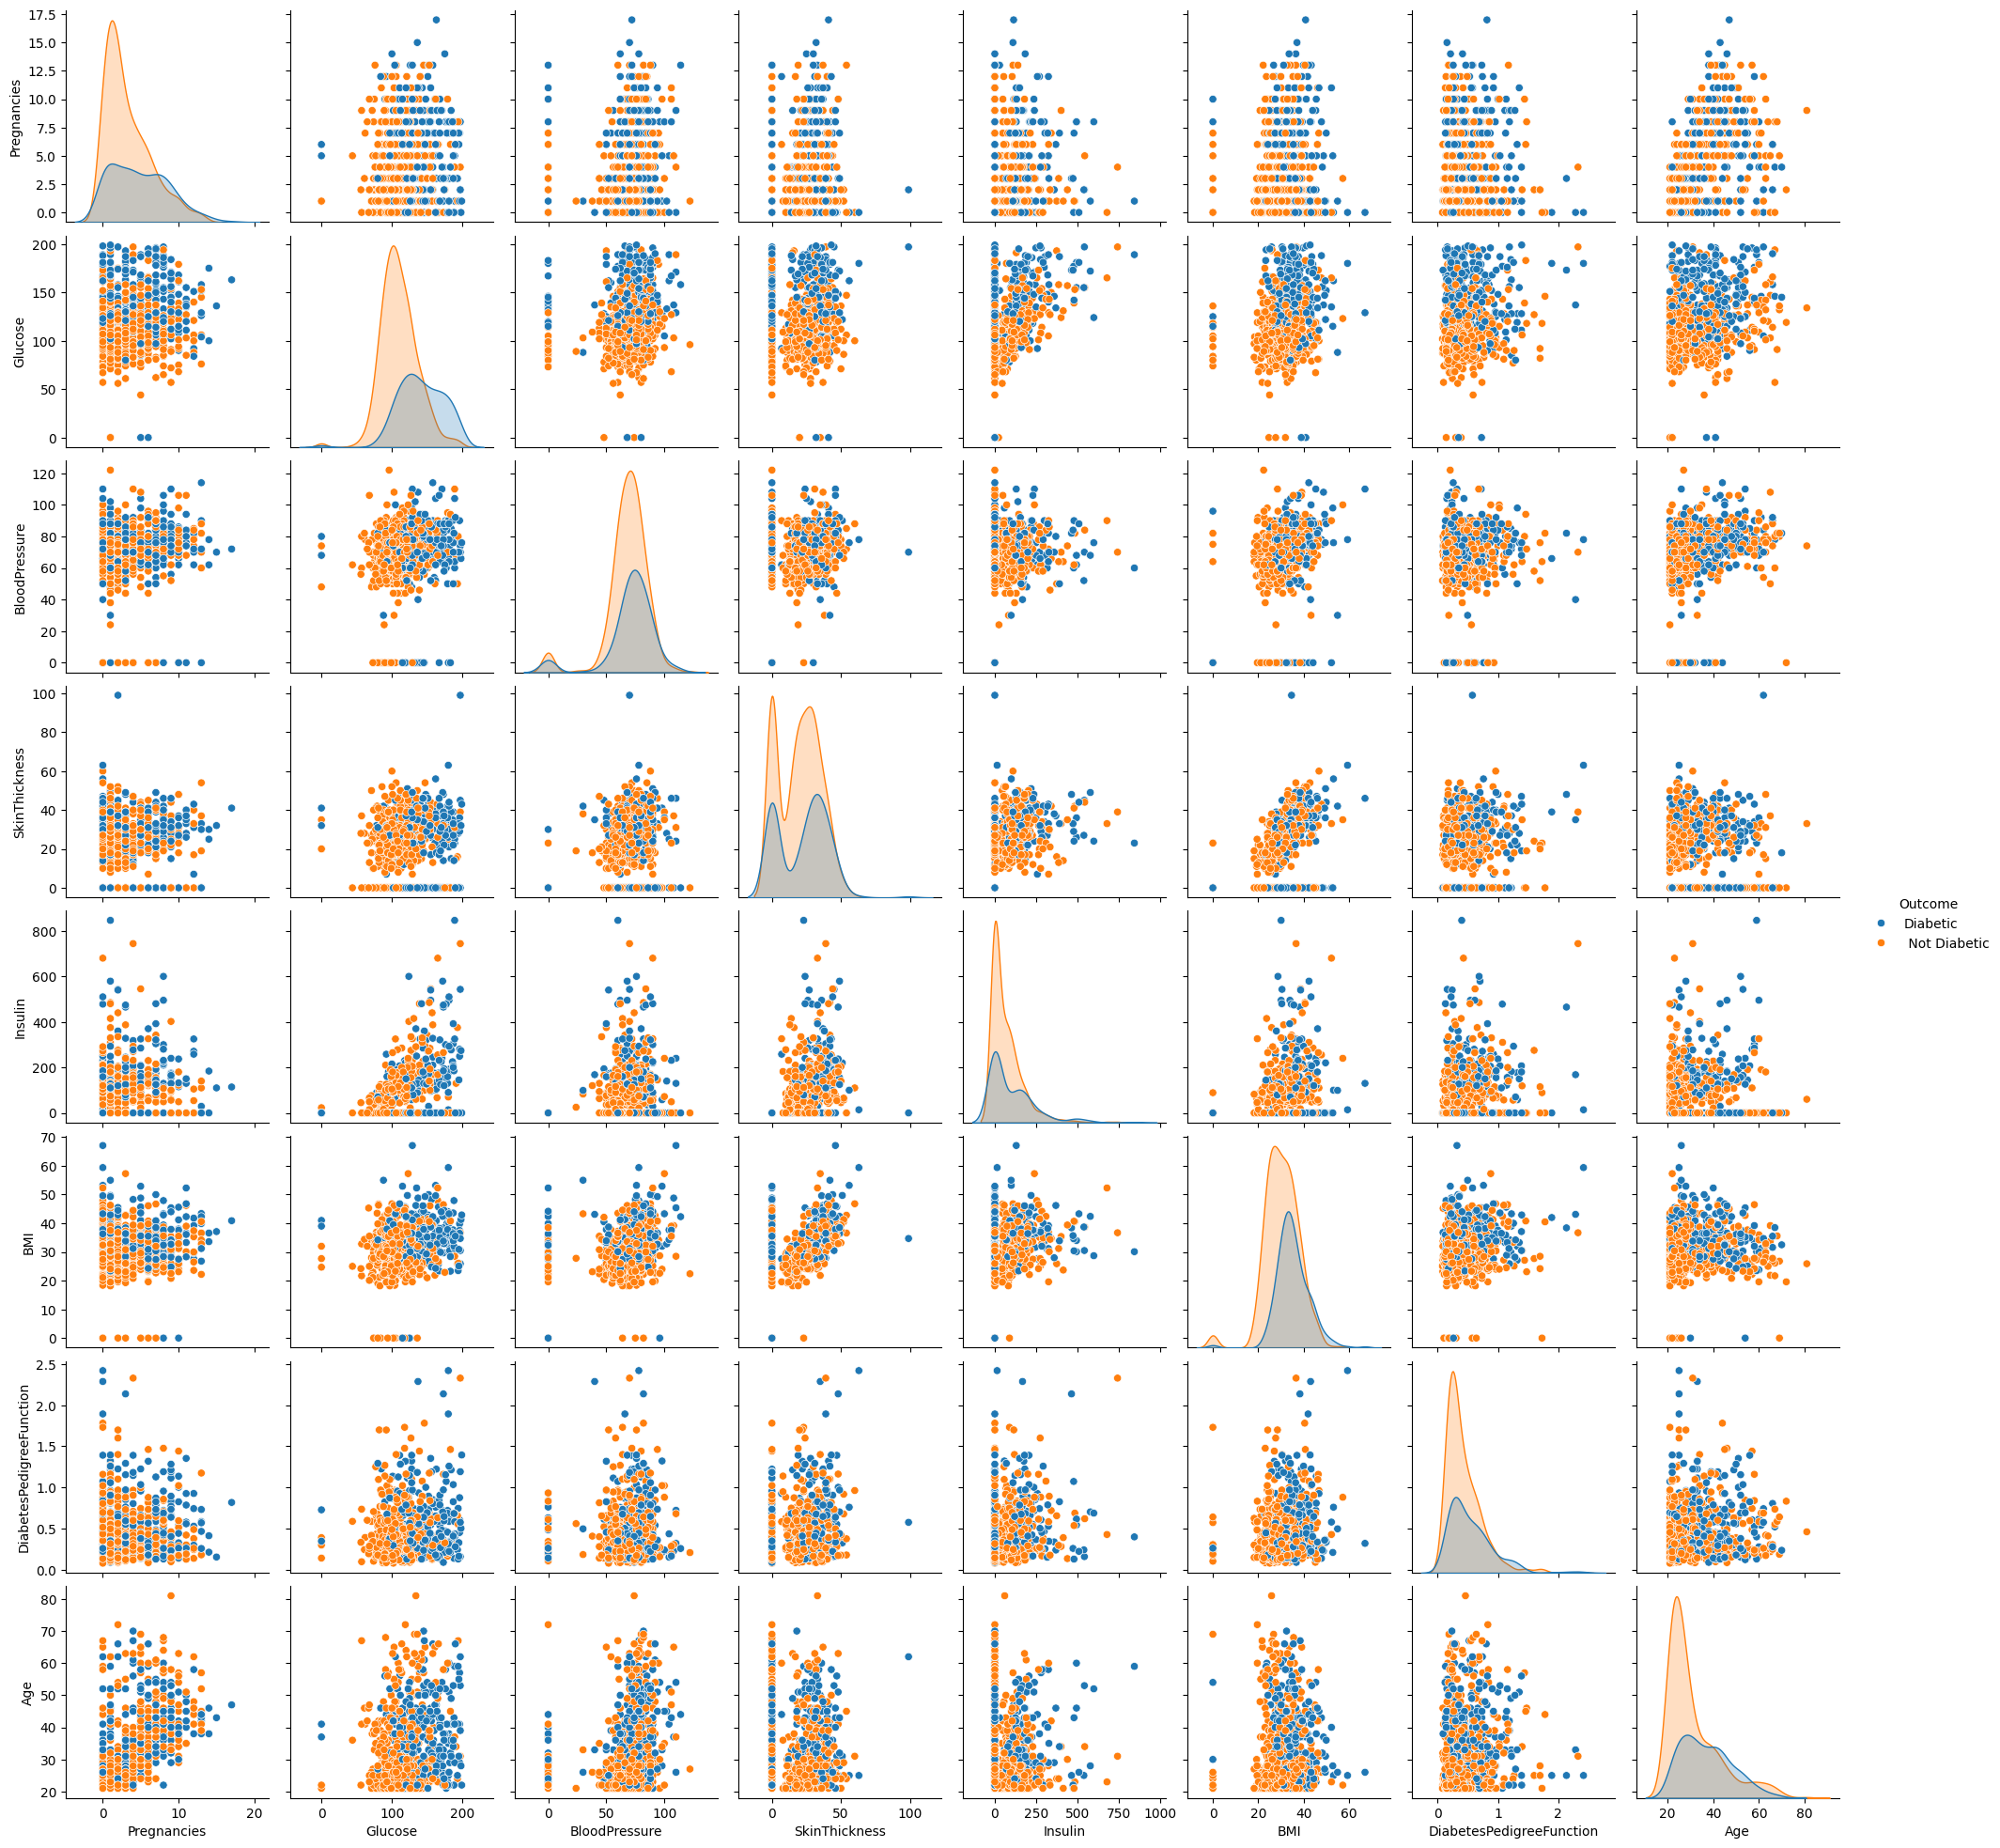

In [17]:
sns.pairplot(df,hue='Outcome')

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1) # independent Features
y = df['Outcome'].values       # Dependent features
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
## deep learning starts
import torch
import torch.nn as nn
import torch.nn.functional as F


In [34]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


(768, 9)

In [38]:
## Creating NN model
class model(nn.Module):
    def __init__(self,input_features=8,Hidden1=20, Hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,Hidden1)
        self.f_connected2=nn.Linear(Hidden1,Hidden2)
        self.out= nn.Linear(Hidden2, out_features)


    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x = self.out(x)
        return x 


In [39]:
torch.manual_seed(20)
modell = model()

In [43]:
modell.parameters

<bound method Module.parameters of model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [46]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modell.parameters(), lr=0.01)

In [48]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = modell.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print('Epoch no {} and the loss is {}'.format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch no 1 and the loss is 3.4572105407714844
Epoch no 11 and the loss is 0.8019207119941711
Epoch no 21 and the loss is 0.6090322136878967
Epoch no 31 and the loss is 0.5917770862579346
Epoch no 41 and the loss is 0.5679708123207092
Epoch no 51 and the loss is 0.5529041886329651
Epoch no 61 and the loss is 0.5410094857215881
Epoch no 71 and the loss is 0.5310389995574951
Epoch no 81 and the loss is 0.5220361351966858
Epoch no 91 and the loss is 0.5135971903800964
Epoch no 101 and the loss is 0.5061254501342773
Epoch no 111 and the loss is 0.498340904712677
Epoch no 121 and the loss is 0.4960551857948303
Epoch no 131 and the loss is 0.48286372423171997
Epoch no 141 and the loss is 0.47560352087020874
Epoch no 151 and the loss is 0.4799225628376007
Epoch no 161 and the loss is 0.47931116819381714
Epoch no 171 and the loss is 0.46500328183174133
Epoch no 181 and the loss is 0.4582158625125885
Epoch no 191 and the loss is 0.4527054727077484
Epoch no 201 and the loss is 0.44579795002937317

In [49]:
import matplotlib as plt 

%matplotlib inline